# Hands on with Fourier Transforms
This exercise will introduce a few pedagogical examples of Fourier transforms. The aim is to familiarize you with python syntax and functions, and help you gain intuition for how Fourier transforms work. We will be skipping much of the theory and mathematical background and instead focus on examples and visualization.

Fourier transforms are used for many applications, but because I'm a radio astronomer, we will use the idea of electric field inducing a voltage on an antenna. If you are unfamiliar with radio waves, think about different frequencies as different colors of light.

### First import some modules
The first import is so we can make plots inline, and is not necessary if you are following along on a terminal environment.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Next we create a time axis
`delta_t` is the time step size (time resolution), `period` is the total time for our sample, and `time` is the array with the time values for every sample.

In [3]:
delta_t = 2.5e-7  # seconds = 250 ns --- I like to put units in comments ---
period = 1.0e-4  # seconds
time = np.arange(0.0, period, delta_t)  # seconds
nt = time.shape[0]  # Number of time samples, this will be handy to have around

### Create some example signals
First we will make a signal with some nice periodic modes. 
This example will demonstrate how a few modes look in the time domain and in the frequency domain.
It will also help to check that our axes are correct.

In [4]:
f1, f2, f3 = 1.0e4, 3.0e4, 6.0e4  # Hz - Frequencies of the harmonic modes we are including
A1, A2, A3 = 1.0, 2.0, 1.5  # Volts - The amplitudes of each of the modes
mode1 = A1 * np.exp(2j * np.pi * f1 * time)  # Here we construct the signal from each mode individually
mode2 = A2 * np.exp(2j * np.pi * f2 * time)
mode3 = A3 * np.exp(2j * np.pi * f3 * time)
all_modes = mode1 + mode2 + mode3  # The total signal is the sum of all three

Before we move on to Fourier transforms, let's look at each signal. Our signals are complex, so let's look at how the real and imaginary parts of one mode are related.

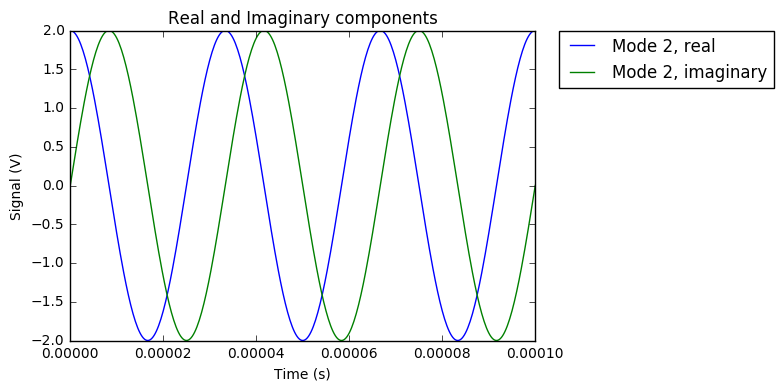

In [5]:
plt.plot(time, np.real(mode2), label='Mode 2, real')
plt.plot(time, np.imag(mode2), label='Mode 2, imaginary')
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')
plt.title('Real and Imaginary components')
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));  # This creates the legend and puts it outside the plot

Notice both real and imaginary are oscillating with the same frequency (defined by `f2` above), but the imaginary part seems to lag behind the real.

Next we plot all three signals, but just the real parts for now.

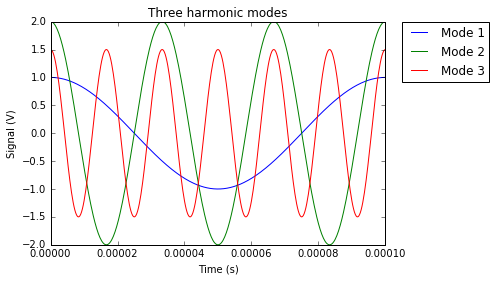

In [47]:
plt.plot(time, np.real(mode1), label='Mode 1')
plt.plot(time, np.real(mode2), label='Mode 2')
plt.plot(time, np.real(mode3), label='Mode 3')
plt.xlabel('Time (s)')
plt.ylabel('Signal (V)')
plt.title('Three harmonic modes')
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

Now we plot the combined signal from all three modes.

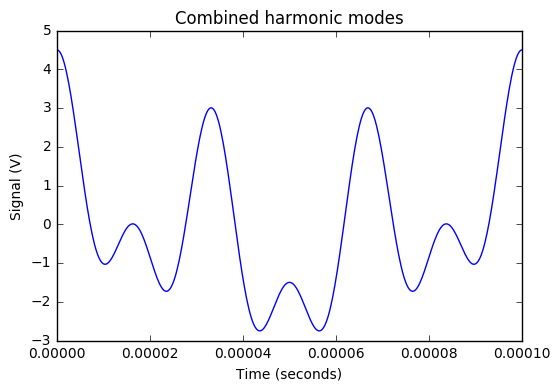

In [6]:
plt.plot(time, np.real(all_modes), label='Real')
plt.xlabel('Time (seconds)')
plt.ylabel('Signal (V)')
plt.title('Combined harmonic modes');

Now the function looks a bit more complicated. But you should still be able to make out the three individual harmonics. There is a broad dip and rise due to our lowest frequency mode (1), And there are four high peaks that occur when modes 2 and 3 are aligned (we call this _constructive interference_). And there are three small peaks at the locations where modes 2 and 3 are anti-aligned (_destructive interference_).

## Fourier transform
Next we perform a Fourier transform to decompose the example signal that we created into frequencies. We know exactly which frequencies we put into the signal, so it shouldn't be too surprising what we get out.

We will use a Fast Fourier Transform (FFT), which is a very efficient way of computing a Fourier transform of regularly sampled data (which we have). I also multiply by delta_t to put the result in physical units (see [my Discrete Fourier Transforms memo](http://loco.lab.asu.edu/adam_beardsley/memos/) for details).

In [70]:
transform = delta_t * np.fft.fft(all_modes)

Before we can plot the transform there are a couple of bookkeeping tasks we must complete. 

First, by default the FFT interprets all frequencies as positive, and puts the lowest frequency in the 0 bin. But we actually want to center the data so the zero frequency is in the middle, negative frequencies to the left, and positive to the right. We do this with `np.fft.fftshift`.

In [71]:
transform = np.fft.fftshift(transform)  # V * s

Then we need to make a frequency axis. Our sampled data determines the frequency modes we measure when we perform the FFT. The frequency resolution (i.e. spacing between measured modes) is given by the reciprocal of the total time sampled, `period`, and the extent of the frequencies (_bandwidth_) is given by the reciprocal of the time resolution, `delta_t`. From this we can construct the axis that goes with the data.

In [111]:
df = 1.0 / period  # Hz
B = 1.0 / delta_t  # Hz
freqs = np.arange(-B / 2, B / 2 + delta_t / 2, df)  # The extra delta_t/2 is a peculiarity to handle the endpoint correctly
nf = freqs.shape[0]  # Number of frequencies.
nt == nf  # Check that we have same number of frequencies as times.

True

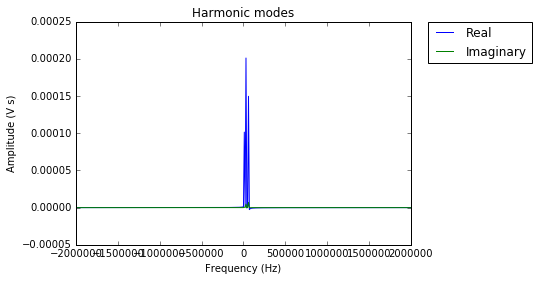

In [83]:
plt.plot(freqs, np.real(transform), label='Real');
plt.plot(freqs, np.imag(transform), label='Imaginary')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (V s)')
plt.title('Harmonic modes');
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

Ok, I promised no surprises, but you probably didn't expect quite this. For one, it looks like there might be three peaks in there, but they're all crammed into the center. That's because we chose relatively low frequency modes so the time-domain plots would look reasonable. Given our time resolution, we could have sampled much higher frequencies. We will fix this below using the `plt.xlim()` function to limit the x-axis range.

Second, the vertical axis looks odd. The amplitudes we put in were 1.0, 2.0, and 1.5. But those were in Volts, and the y-axis is in V s. There is actually a very subtle discussion to be had regarding the normalization of this plot, given that we input very specific modes. But I'll leave that for a another day. For now, we can relate the y-axis back to the amplitudes we put in by dividing by the total time period.

Finally, the x-axis isn't very aesthetically pleasing. We can make it a little nicer by plotting in kHz.

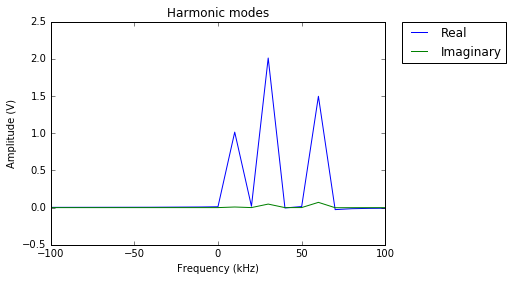

In [82]:
plt.plot(freqs / 1e3, np.real(transform) / period, label='Real');
plt.plot(freqs / 1e3, np.imag(transform) / period, label='Imaginary')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude (V)')
plt.title('Harmonic modes');
plt.xlim([-100, 100])
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

Now that looks a more like we expected. We have our three peaks right where we put them - 10, 30, and 60 kHz, with amplitudes of 1.0, 2.0, and 1.5 respectively. Let's move onto other examples.

## Two tophats
Another simple function to consider is a tophat - it is zero, then nonzero but constant, then zero again. It looks like a tophat. You get it, right? Although it doesn't really make sense to think of this as electric fields anymore, it's a good pedagogical example. So I'm going to drop units on the y-axes for now.

We'll make two tophats that have equal area, but different widths.

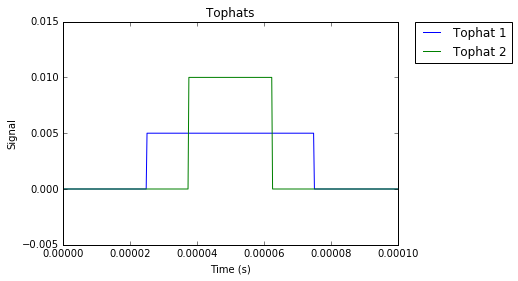

In [112]:
tophat1, tophat2 = np.zeros_like(time), np.zeros_like(time)
tophat1[100:300] = 1.0 / 200.0
tophat2[150:250] = 1.0 / 100.0
plt.plot(time, tophat1, label='Tophat 1')
plt.plot(time, tophat2, label='Tophat 2')
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Tophats')
plt.ylim([-.005, .015])
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

Next we take the Fourier transform of both, combining a few steps together now that you're a pro. We will also just plot the absolute value instead of real and imaginary. This is so we can just look at the total amplitude in each frequency.

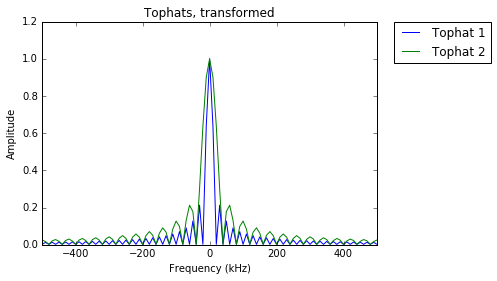

In [113]:
ftophat1 = np.fft.fftshift(np.fft.fft(tophat1))
ftophat2 = np.fft.fftshift(np.fft.fft(tophat2))
plt.plot(freqs / 1e3, np.abs(ftophat1), label='Tophat 1');
plt.plot(freqs / 1e3, np.abs(ftophat2), label='Tophat 2')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Amplitude')
plt.xlim([-500, 500])
plt.title('Tophats, transformed');
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

There are a lot of cool features here. 

It's a little hard to tell, but the peaks are exactly the same at frequency 0. This is a result of how we forced the areas of the tophats themselves to be equal (convince yourself with some math if you would like). 

Next, both functions seem to extend out quite far. In fact they extend all the way out to the highest frequencies, and we're only showing the inner 1/4. We'll explore below what happens if we drop some of those higher frequencies.

The last thing we will note here is that the frequency distribution of Tophat 2 is a bit wider than Tophat 1. But the actual tophat widths are the opposite! This is general rule of thumb with Fourier transforms - the wider a signal, the more narrow the transform, and vice versa. This has interesting consequences including a nice way of deriving the Heisenberg uncertainty principle.

### Reconstructing the tophat
One of the great things about the Fourier transform is that it's invertible. Not only that, but the inversion is just another Fourier transform! Actually, it's slightly different, but the mechanics are the same. In this section we are going to reconstruct Tophat 1, then we will approximate it using fewer frequency modes.

First, the inversion:

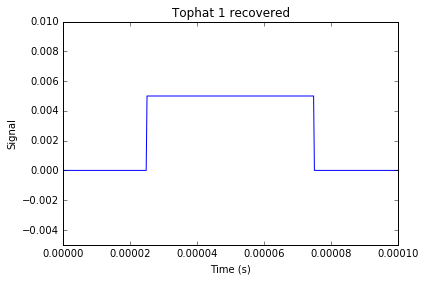

In [114]:
th_recovered = np.fft.ifft(np.fft.ifftshift(ftophat1))
plt.plot(time,th_recovered)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.title('Tophat 1 recovered')
plt.ylim([-.005, .01]);

Ok, ok, that wasn't very impressive. Now let's see what happens when we trim off some of the higher frequencies. Remember that the frequencies are both positive and negative, so we will trim on both sides.

In [147]:
trimmed1, trimmed2, trimmed3 = np.zeros_like(ftophat1), np.zeros_like(ftophat1), np.zeros_like(ftophat1)
nkeep1, nkeep2, nkeep3 = 25, 50, 100
trimmed1[(nf/2-nkeep1/2):(nf/2+nkeep1/2)] = ftophat1[(nf/2-nkeep1/2):(nf/2+nkeep1/2)]
trimmed2[(nf/2-nkeep2/2):(nf/2+nkeep2/2)] = ftophat1[(nf/2-nkeep2/2):(nf/2+nkeep2/2)]
trimmed3[(nf/2-nkeep3/2):(nf/2+nkeep3/2)] = ftophat1[(nf/2-nkeep3/2):(nf/2+nkeep3/2)]

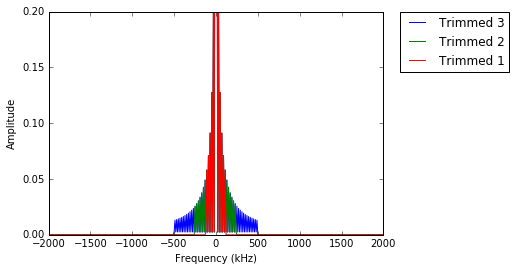

In [149]:
plt.plot(freqs / 1e3, abs(trimmed3), label='Trimmed 3')
plt.plot(freqs / 1e3, abs(trimmed2), label='Trimmed 2')
plt.plot(freqs / 1e3, abs(trimmed1), label='Trimmed 1')
plt.xlabel('Frequency (kHz)'); plt.ylabel('Amplitude')
plt.ylim([0, 0.2]);
plt.legend(loc=2, borderaxespad=0., bbox_to_anchor=(1.05, 1));

The above plot just shows which regions of the transform we kept in the three trimmed examples. We are only keeping about a sixteenth the frequencies in the first trim, about an eighth in the second, and about a quarter in the third. Below we reconstruct the tophat with these trimmed transforms.

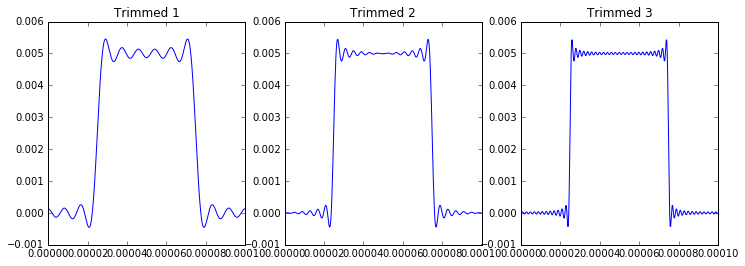

In [150]:
recover1 = np.fft.ifft(np.fft.ifftshift(trimmed1))
recover2 = np.fft.ifft(np.fft.ifftshift(trimmed2))
recover3 = np.fft.ifft(np.fft.ifftshift(trimmed3))
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(time, recover1)
plt.title('Trimmed 1')
plt.subplot(132)
plt.plot(time, recover2)
plt.title('Trimmed 2')
plt.subplot(133)
plt.plot(time, recover3)
plt.title('Trimmed 3');

We see that even with only a sixteenth of the frequencies we can easily make out the general shape of the tophat in the first case. But the details are a bit fuzzy. Remember that when we only keep low frequencies, we're essentially limiting ourselves to reconstructing the tophat with relatively slowly oscillating sine and cosine functions. So while the broad features are there, we miss out on sharp features like the edges of the tophat. We see in the following two cases that as we add higher frequencies the sharpness of the edge comes back. In order to get all the way back to the squared function we would need all frequencies.

But sometimes it's good enough to get close, and this is a way we can compress data. If we're not interested in the small details, it can be useful to only store the low frequencies and still have a decent representation of the signal.